In [1]:
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

Import Dataset

In [2]:
kings_county_df = pd.read_csv("data/kc_house_data_train.csv", index_col='Unnamed: 0')
kings_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


Descriptive Stats

In [3]:
kings_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

### 1. Data Cleaning

In [4]:
kings_county_df['date'] = pd.to_datetime(kings_county_df['date'].str.slice(0,8),format="%Y-%m-%d")
dictNumTimesSold = dict(kings_county_df.groupby('id').id.count().sort_values())
kings_county_df.drop(labels =['id', 'lat', 'long'], axis=1, inplace=True)
kings_county_df['zipcode'] = kings_county_df['zipcode'].apply(str)

In [5]:
kings_county_df.query("bedrooms == 33")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
8597,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700


In [6]:
kings_county_df.at[8597,'bedrooms'] = 3

In [7]:
kings_county_df.bedrooms.value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

In [8]:
kings_county_df.bathrooms.value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
kings_county_df.query("bathrooms == 0")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
483,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050
1120,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000
3032,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200
5424,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399
9060,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,1160,42882
9286,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061
10067,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850
12982,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,1690,19290


In [10]:
kings_county_df = kings_county_df[(kings_county_df.bathrooms != 0) & (kings_county_df.bedrooms != 0) & (kings_county_df.bathrooms >= 1)]


In [11]:
kings_county_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
kings_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17222 entries, 0 to 17289
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17222 non-null  datetime64[ns]
 1   price          17222 non-null  float64       
 2   bedrooms       17222 non-null  int64         
 3   bathrooms      17222 non-null  float64       
 4   sqft_living    17222 non-null  int64         
 5   sqft_lot       17222 non-null  int64         
 6   floors         17222 non-null  float64       
 7   waterfront     17222 non-null  int64         
 8   view           17222 non-null  int64         
 9   condition      17222 non-null  int64         
 10  grade          17222 non-null  int64         
 11  sqft_above     17222 non-null  int64         
 12  sqft_basement  17222 non-null  int64         
 13  yr_built       17222 non-null  int64         
 14  yr_renovated   17222 non-null  int64         
 15  zipcode        1722

<AxesSubplot:>

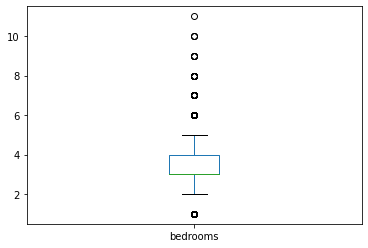

In [13]:
kings_county_df.bedrooms.plot(kind='box')

<AxesSubplot:>

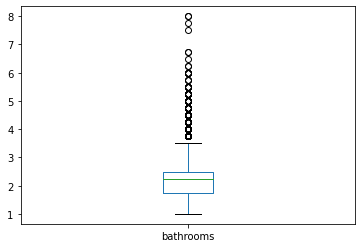

In [14]:
kings_county_df.bathrooms.plot(kind='box')

In [15]:
kings_county_df.groupby('bedrooms').price.mean()

bedrooms
1     3.391546e+05
2     4.015678e+05
3     4.657784e+05
4     6.379092e+05
5     7.847411e+05
6     8.377285e+05
7     9.861672e+05
8     1.255600e+06
9     8.167998e+05
10    8.193333e+05
11    5.200000e+05
Name: price, dtype: float64

In [16]:
kings_county_df.bedrooms.value_counts().sort_index()

1      137
2     2186
3     7853
4     5485
5     1283
6      229
7       30
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
kings_county_df['bedrooms'] = np.where(kings_county_df['bedrooms'] >= 7, 7, kings_county_df['bedrooms'])

In [18]:
kings_county_df.bedrooms.value_counts().sort_index()

1     137
2    2186
3    7853
4    5485
5    1283
6     229
7      49
Name: bedrooms, dtype: int64

In [19]:
kings_county_df.groupby('bathrooms').price.mean()

bathrooms
1.00    3.463658e+05
1.25    6.010000e+05
1.50    4.074694e+05
1.75    4.582803e+05
2.00    4.557473e+05
2.25    5.372734e+05
2.50    5.568162e+05
2.75    6.545027e+05
3.00    7.149029e+05
3.25    9.656770e+05
3.50    9.289996e+05
3.75    1.198263e+06
4.00    1.309828e+06
4.25    1.532047e+06
4.50    1.328587e+06
4.75    1.817828e+06
5.00    1.749518e+06
5.25    1.866118e+06
5.50    2.803286e+06
5.75    3.143333e+06
6.00    2.946833e+06
6.25    3.094000e+06
6.50    2.238890e+06
6.75    2.734000e+06
7.50    4.500000e+05
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

In [20]:
kings_county_df.bathrooms.value_counts().sort_index()

1.00    3099
1.25       6
1.50    1167
1.75    2431
2.00    1549
2.25    1666
2.50    4319
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

In [21]:
kings_county_df['bathrooms'] = np.where(kings_county_df['bathrooms']==1.25, 1, kings_county_df['bathrooms'])
kings_county_df['bathrooms'] = np.where(kings_county_df['bathrooms']>=5, 5, kings_county_df['bathrooms'])
kings_county_df.bathrooms.value_counts().sort_index()



1.00    3105
1.50    1167
1.75    2431
2.00    1549
2.25    1666
2.50    4319
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      53
Name: bathrooms, dtype: int64

In [22]:
kings_county_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [23]:
kings_county_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.722200e+04,17222.000000,17222.000000,17222.000000,1.722200e+04,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000
mean,5.416820e+05,3.375915,2.115332,2085.476309,1.522804e+04,1.491290,0.007781,0.237951,3.409012,7.661770,1792.348798,293.127511,1970.872024,83.790733,1989.506329,12849.133724
std,3.735401e+05,0.893957,0.757389,918.486549,4.234536e+04,0.538711,0.087867,0.774457,0.650225,1.167142,828.237028,443.674869,29.327414,400.296888,684.637237,27192.749721
min,7.800000e+04,1.000000,1.000000,390.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,399.000000,659.000000
25%,3.230000e+05,3.000000,1.750000,1430.000000,5.080250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5110.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.638500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.475000e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,1996.000000,0.000000,2360.000000,10092.750000
max,7.700000e+06,7.000000,5.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,858132.000000


In [29]:
continuous = ['price',  'sqft_living', 'sqft_lot',
         'sqft_above', 'sqft_basement',   
       'sqft_living15', 'sqft_lot15']

categorical = ['waterfront','condition','grade',
               'view','bedrooms', 'bathrooms','floors','zipcode']

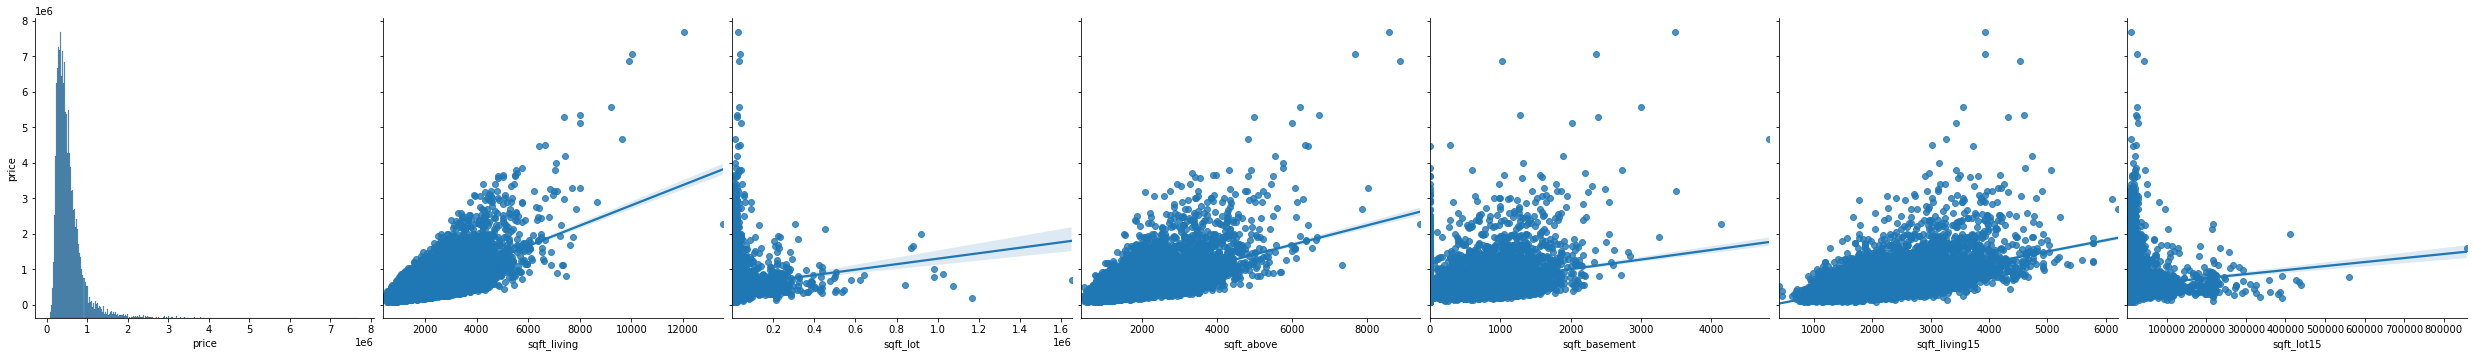

In [25]:
sns.pairplot(data = kings_county_df, y_vars="price", x_vars=continuous, height=5, kind='reg')



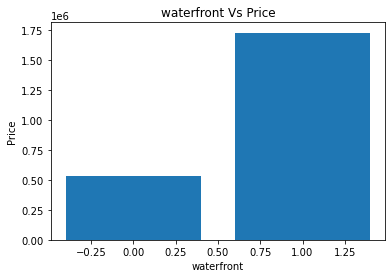

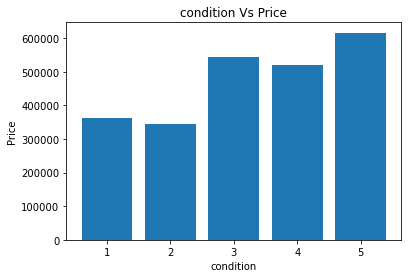

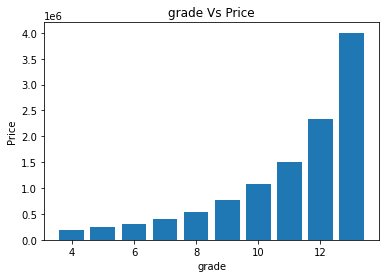

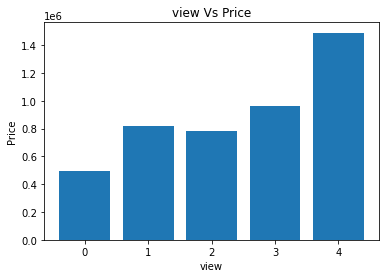

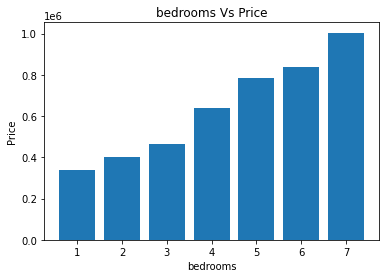

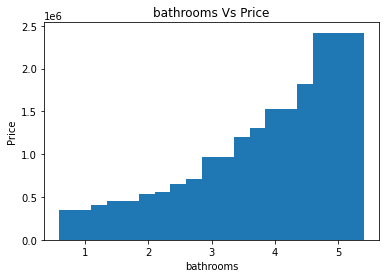

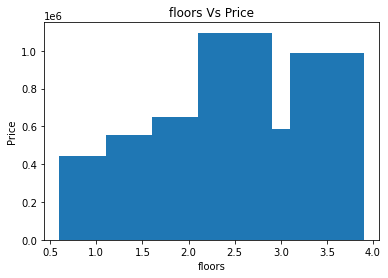

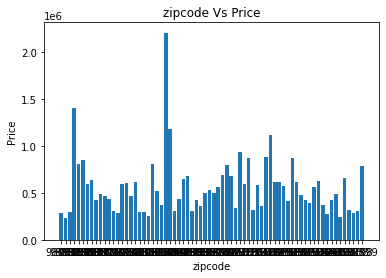

In [30]:
for x in categorical:
    group = kings_county_df.groupby(x).price.mean()
    plt.figure()
    plt.bar(group.index,group.values)
    plt.title(f'{x} Vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    # Show/save figure as desired.
    plt.show()

In [27]:
conditions = [(kings_county_df['grade'] <= 8),
              (kings_county_df['grade'] <= 12),
             (kings_county_df['grade'] <= 13)]
choices = ['low','medium','high']
kings_county_df['grade_cat'] = np.select(conditions, choices)

<AxesSubplot:xlabel='grade_cat'>

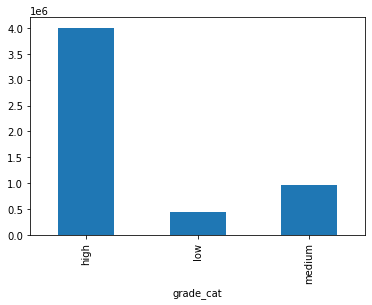

In [28]:
kings_county_df.groupby('grade_cat').price.mean().plot(kind='bar')

<AxesSubplot:>

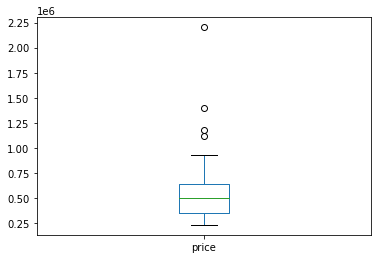

In [36]:
kings_county_df.groupby('zipcode').price.mean().plot(kind='box')

<BarContainer object of 70 artists>

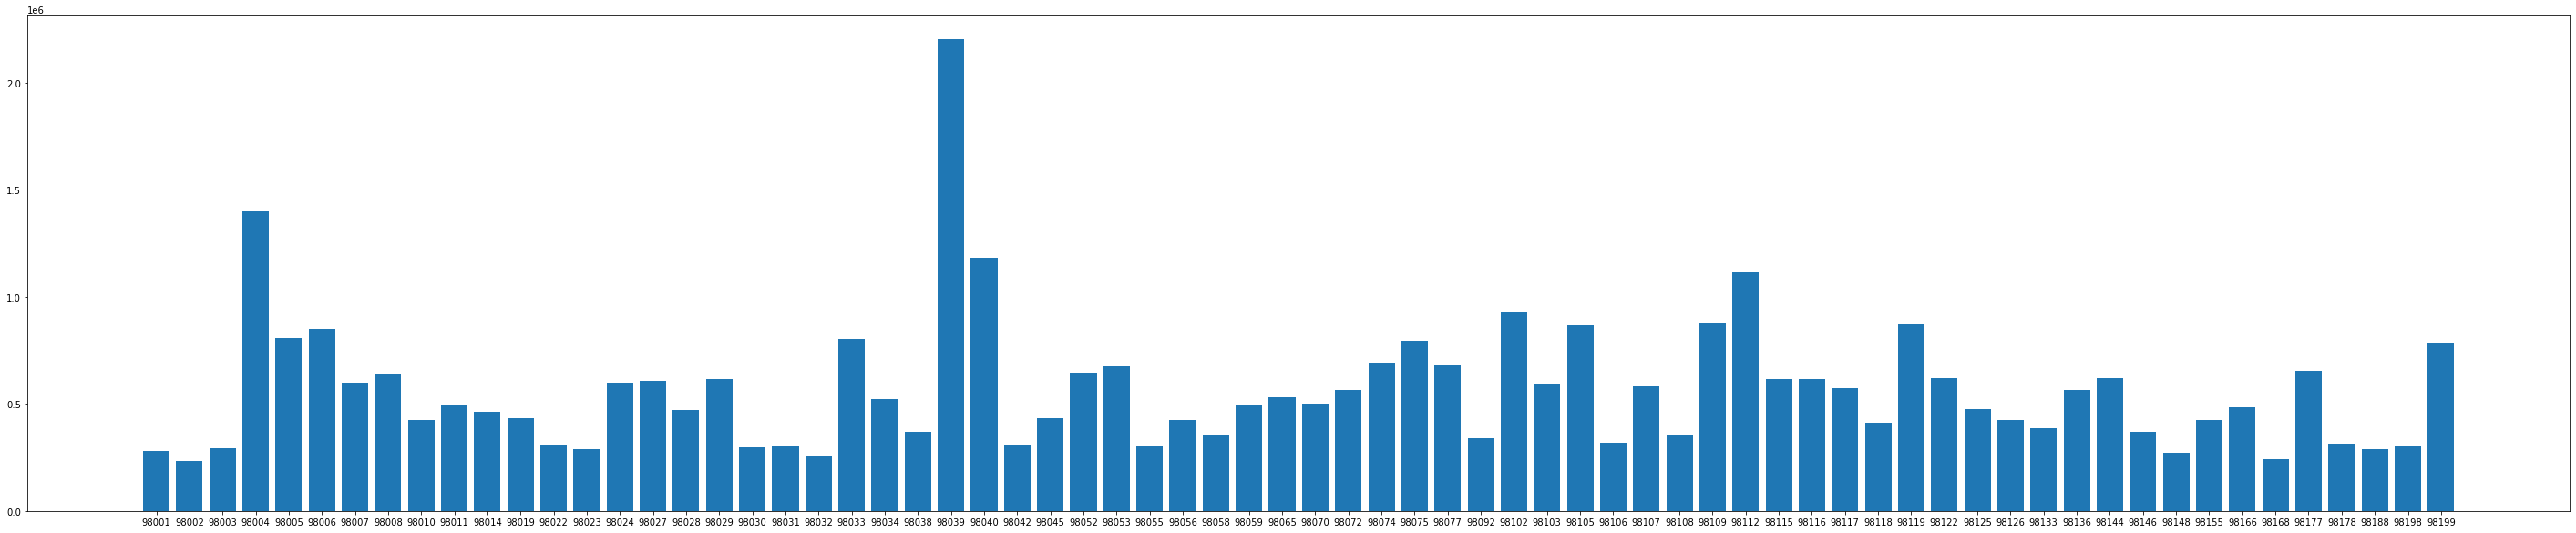

In [82]:
groupedZip = kings_county_df.groupby('zipcode')['price'].mean()

fig, ax = plt.subplots(figsize=(50,10))
ax.bar(x = groupedZip.index,
        height = groupedZip.values)


In [39]:
categorical = ['waterfront','condition','grade_cat',
               'view','bedrooms', 'bathrooms','floors','zipcode']

In [41]:
kings_county_df_w_dummies = pd.get_dummies(kings_county_df, columns=categorical, drop_first=True)
kings_county_df_w_dummies.head()

,date,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_1,condition_2,condition_3,condition_4,condition_5,grade_cat_low,grade_cat_medium,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,2014-10-06,365000.0,2070,8893,8,2070,0,1986,0,2390,7700,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-08-21,865000.0,2900,6730,8,1830,1070,1977,0,2370,6283,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-08-15,1038000.0,3770,10893,11,3770,0,1997,0,3710,9685,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-03-31,1490000.0,4560,14608,12,4560,0,1990,0,4050,14226,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-07-14,711000.0,2550,5376,9,2550,0,2004,0,2250,4050,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
kings_county_df_w_dummies.iloc[:, 48:].sum().sort_values()

zipcode_98039     42
zipcode_98148     43
zipcode_98024     64
zipcode_98010     74
zipcode_98102     79
zipcode_98109     85
zipcode_98070     94
zipcode_98014     98
zipcode_98032    101
zipcode_98188    108
zipcode_98007    122
zipcode_98005    140
zipcode_98019    143
zipcode_98119    148
zipcode_98108    149
zipcode_98002    157
zipcode_98077    161
zipcode_98011    163
zipcode_98105    170
zipcode_98045    175
zipcode_98022    187
zipcode_98030    201
zipcode_98166    207
zipcode_98055    209
zipcode_98107    211
zipcode_98168    213
zipcode_98178    213
zipcode_98136    214
zipcode_98031    214
zipcode_98072    215
zipcode_98112    216
zipcode_98177    218
zipcode_98028    218
zipcode_98198    219
zipcode_98003    224
zipcode_98008    226
zipcode_98040    229
zipcode_98122    235
zipcode_98004    237
zipcode_98146    240
zipcode_98065    247
zipcode_98029    250
zipcode_98106    265
zipcode_98199    266
zipcode_98116    266
zipcode_98144    269
zipcode_98126    275
zipcode_98092

<AxesSubplot:>

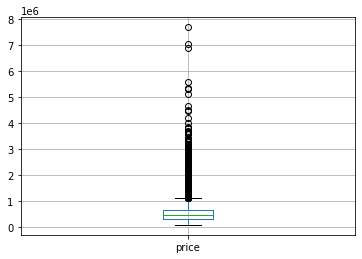

In [48]:
kings_county_df_w_dummies.boxplot(['price'],)

In [49]:
kings_county_df_w_dummies.sort_values('price', ascending=False)

,date,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_1,condition_2,condition_3,condition_4,condition_5,grade_cat_low,grade_cat_medium,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
10366,2014-10-13,7700000.0,12050,27600,13,8570,3480,1910,1987,3940,8800,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6903,2014-06-11,7062500.0,10040,37325,11,7680,2360,1940,2001,3930,25449,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7519,2014-09-19,6885000.0,9890,31374,13,8860,1030,2001,0,4540,42730,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2232,2014-08-04,5570000.0,9200,35069,13,6200,3000,2001,0,3560,24345,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1979,2015-04-13,5350000.0,8000,23985,12,6720,1280,2009,0,4600,21750,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15650,2015-04-30,84000.0,700,20130,6,700,0,1949,0,1490,18630,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3430,2014-05-29,83000.0,900,8580,5,900,0,1918,0,2060,6533,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1269,2014-05-08,82500.0,520,22334,5,520,0,

In [66]:
above_10std = kings_county_df_w_dummies.price.mean()+(10*kings_county_df_w_dummies.price.std())
above_10std



4277083.458190033

In [70]:
kings_county_df_w_dummies.shape

(17212, 117)

In [69]:
kings_county_df_w_dummies = kings_county_df_w_dummies[(kings_county_df_w_dummies['price']<=above_10std)]

kings_county_df_w_dummies[(kings_county_df_w_dummies['price']<=above_10std)].shape


(17212, 117)

### Feature Engineering

Created a few new columns: <br>
    
    - Age as in age of the house
    - Converted yr_built to a datetime obj
    - Created a bool column for if a house was renovated
    - Created a column for the month the house was sold
    - Created a column for the year the house was sold
    - Created a column for the season the house was sold
    

In [ ]:
kings_county_df['num_times_sold'] = kings_county_df['id'].map(dictNumTimesSold)


In [ ]:
kings_county_df.age.value_counts().sort_values()

In [ ]:
kings_county_df.age.plot(kind='box')

In [ ]:
kings_county_df.is_renovated.value_counts()

In [ ]:
kings_county_df.month_sold.value_counts().sort_index()

In [ ]:
kings_county_df.groupby('month_sold').price.mean().plot(kind='bar')

In [ ]:
kings_county_df.season_sold.value_counts()

In [ ]:
kings_county_df.groupby('season_sold').price.mean().plot(kind='bar')

In [ ]:
kings_county_df.year_sold.value_counts()

In [ ]:
kings_county_df.groupby('year_sold').price.mean().plot(kind = 'bar')